# TP 1 - Punto 5 - Mediciones:

In [1]:
# Realizamos los imports necesarios

import math, random, pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

from util import time_algorithm

random.seed(1312)
np.random.seed(1312)

sns.set_theme()

### Definimos nuestro algoritmo propuesto, de complejidad $\mathcal{O}(n \log n)$:

In [2]:
def ordenar_batallas(tiempos, importancias):
    n = len(tiempos)
    batallas = []
    
    for i in range(n):
        ratio = importancias[i] / tiempos[i]
        batallas.append((i + 1, tiempos[i], importancias[i], ratio))
    
    batallas.sort(key=lambda x: x[3], reverse=True)
    return batallas

### Generamos nuestros casos:

In [3]:
def get_random_array(size: int):
    tiempos = np.random.randint(1, 101, size).tolist()
    importancias = np.random.randint(1, 101, size).tolist()
    return [tiempos, importancias]

x = np.linspace(100, 1_000_000, 20).astype(int)

# Medición de tiempos
results = time_algorithm(ordenar_batallas, x, lambda s: get_random_array(s))

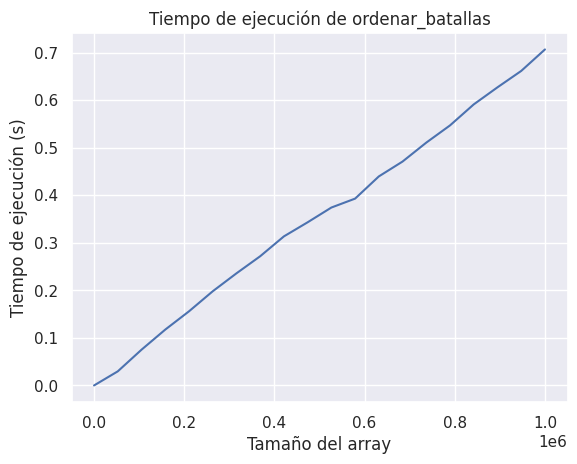

In [7]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución de ordenar_batallas')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
None

### Realizamos ahora el ajuste por cuadrados mínimos:

In [9]:
f = lambda x, c1, c2: c1 * x * np.log(x) + c2 

c, pcov = sp.optimize.curve_fit(f, x, [results[n] for n in x])

print(f"c_1 = {c[0]}, c_2 = {c[1]}")
r = np.sum((c[0] * x * np.log(x) + c[1] - [results[n] for n in x])**2)
print(f"Error cuadrático total: {r}")

c_1 = 4.9555515633413407e-08, c_2 = 0.02235078255153667
Error cuadrático total: 0.0026437217729278475


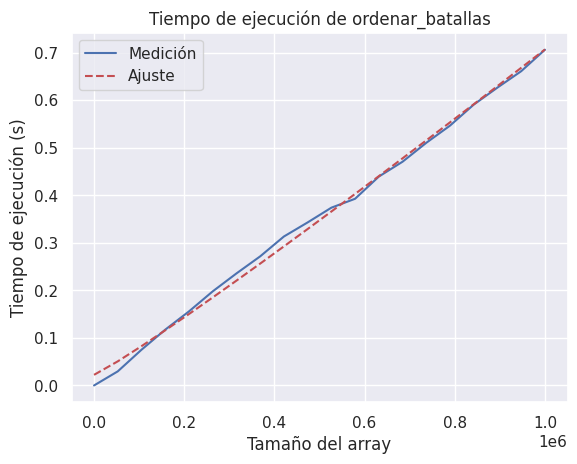

In [10]:
ax.plot(x, [c[0] * n * np.log(n) + c[1] for n in x], 'r--', label="Ajuste")
ax.legend()
fig

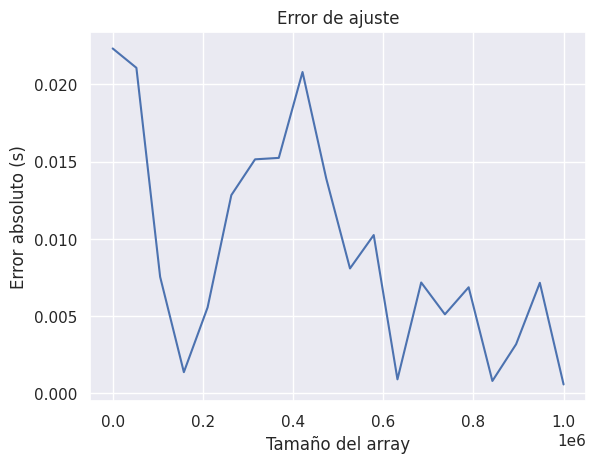

In [11]:
ax: plt.Axes
fig, ax = plt.subplots()
errors = [np.abs(c[0] * n * np.log(n) + c[1] - results[n]) for n in x]
ax.plot(x, errors)
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
None